<a href="https://colab.research.google.com/github/omerfarukeker/Causes-of-Death-Analysis/blob/master/Causes_of_Death.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Causes of Death

In this notebook we will examine causes of death dataset, published by "Our World in Data"

https://ourworldindata.org/causes-of-death

The dataset consists of 34 different cause of death counts by country per year. It covers the years from 1990 to 2017

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Load data

Dataset is downloaded, uploaded to our Google Drive where we can access from Google's Colab environment by simply mounting the drive

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The dataset consist of 37 columns, 34 of them gives the death counts for each dead cause. Also, year and country information is provided. Each row represents combinations country/year pair

In [3]:
df = pd.read_csv("/content/drive/My Drive/Databases/Causes of Death/annual-number-of-deaths-by-cause.csv")
df.head(10)

,Entity,Code,Year,Execution,Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Terrorism (deaths),Cardiovascular diseases (deaths),Dementia (deaths),Kidney disease (deaths),Respiratory diseases (deaths),Liver diseases (deaths),Digestive diseases (deaths),Hepatitis (deaths),Cancers (deaths),Parkinson disease (deaths),Fire (deaths),Malaria (deaths),Drowning (deaths),Homicide (deaths),HIV/AIDS (deaths),Drug use disorders (deaths),Tuberculosis (deaths),Road injuries (deaths),Maternal disorders (deaths),Neonatal disorders (deaths),Alcohol use disorders (deaths),Natural disasters (deaths),Diarrheal diseases (deaths),Heat (hot and cold exposure) (deaths),Nutritional deficiencies (deaths),Suicide (deaths),Conflict (deaths),Diabetes (deaths),Poisonings (deaths)
0,Afghanistan,AFG,1990,NaN,6469.977091,22836.912346,295.382207,1607.703797,12.0,46498.085024,1959.215373,3155.356340,5954.958582,1453.044977,3698.889864,793.670257,10061.873743,324.828945,311.776082,463.612423,1508.416465,1279.945985,32.098129,78.254192,4332.690583,4575.180311,2283.021996,18075.800290,75.595221,0.000000,8817.260208,226.789403,1667.386134,740.448500,1489.999290,3361.736409,170.742286
1,Afghanistan,AFG,1991,NaN,6347.158764,22325.633931,303.866598,1558.132316,68.0,46967.361037,1987.812878,3124.082631,6023.386323,1468.860745,3743.187336,788.536280,10171.333511,328.452300,311.500538,487.191614,1473.225021,1524.641593,37.524158,81.284586,4288.640464,4762.068567,2337.414404,18349.129972,76.109641,1349.999434,8588.463794,164.830417,1616.756233,762.245179,3370.000153,3362.470217,172.032657
2,Afghanistan,AFG,1992,NaN,6659.741428,23205.280750,317.750121,1617.721576,49.0,48355.558515,2025.102326,3192.278428,6217.245157,1524.528468,3894.366133,823.915867,10592.367581,334.707212,338.614263,521.714216,1537.813332,1684.808857,50.670559,91.010197,4475.257542,5531.136933,2781.918017,19982.149565,81.138310,614.000083,8924.932420,92.522183,1678.557625,856.912927,4343.997795,3445.705567,190.404111
3,Afghanistan,AFG,1993,NaN,8068.386263,28229.715397,333.978331,1931.808553,NaN,50072.563899,2064.827903,3343.974014,6468.245470,1598.643747,4136.479100,892.642586,11126.644646,341.810023,382.401317,675.657696,1714.815875,1906.959925,58.433049,103.481991,4909.050325,6613.963510,3336.796608,27291.235292,87.514744,109.999998,11976.501319,104.167461,2001.122436,975.603772,4097.000207,3563.236367,217.622614
4,Afghanistan,AFG,1994,NaN,9432.845127,32652.297630,348.419085,2351.629206,22.0,51416.815442,2101.020630,3480.299710,6678.495850,1649.977411,4318.692618,950.379553,11477.937575,348.223321,417.717979,782.445339,1949.699499,2229.924043,65.531176,111.296397,5352.634058,7341.204565,3558.597715,29862.680874,90.464149,160.000003,13296.448475,112.072652,2434.014268,1028.742412,8959.000461,3639.707847,236.240573
5,Afghanistan,AFG,1995,NaN,10122.772832,34483.551895,363.583913,2507.115188,5.0,52072.368671,2125.778554,3523.149810,6805.618226,1690.717095,4436.973375,982.004154,11711.273936,352.159825,447.362217,815.045203,2187.500354,2325.997879,72.735404,117.934966,5536.274369,7936.178185,3706.526833,30758.544712,91.819330,380.999985,14767.431175,118.013587,2595.907455,1065.582016,5508.000168,3665.833847,249.757440
6,Afghanistan,AFG,1996,NaN,10317.320087,34845.255133,364.559304,2468.615820,31.0,52795.718158,2146.777828,3525.948414,6888.664023,1716.645566,4510.381672,1013.737021,11898.875427,355.364845,458.002488,886.413769,2245.104140,2626.043189,78.533651,124.717924,5560.655853,8270.543843,3846.393973,31818.950695,93.436616,69.999999,14153.892087,122.193282,2557.850832,1099.003806,3254.999587,3735.974593,255.847563
7,Afghanistan,AFG,1997,NaN,10501.423140,35061.726523,365.918125,2451.122257,4.0,53512.784374,2168.375735,3536.462923,6972.195772,1746.918412,4591.336368,1049.423509,12109.522390,358.733395,469.227613,894.728625,2308.220447,2394.441220,83.752944,132.223909,5605.857165,8349.815930,3989.500868,32260.115611,95.3

There are some missing values in some of the columns. The colums with death counts will be filled with zero.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6686 entries, 0 to 6685
Data columns (total 37 columns):
Entity                                     6686 non-null object
Code                                       5545 non-null object
Year                                       6686 non-null int64
Execution                                  267 non-null object
Meningitis (deaths)                        6468 non-null float64
Lower respiratory infections (deaths)      6468 non-null float64
Intestinal infectious diseases (deaths)    6156 non-null float64
Protein-energy malnutrition (deaths)       6468 non-null float64
Terrorism (deaths)                         2891 non-null float64
Cardiovascular diseases (deaths)           6468 non-null float64
Dementia (deaths)                          6468 non-null float64
Kidney disease (deaths)                    6468 non-null float64
Respiratory diseases (deaths)              6468 non-null float64
Liver diseases (deaths)                    6468 non-nu

A part of the data (218 rows) is filled with NaN except the **Terrorism** column. One can choose to fill those NaN cells with 0, or drop those rows which leads to lost of information for terrorism counts for that particular year/country pairs of 218 rows. We will choose the first option

In [5]:
df[df["Fire (deaths)"].isnull()].sum()

Entity                                     Australasia & OceaniaAustralasia & OceaniaAust...
Year                                                                                  436559
Meningitis (deaths)                                                                        0
Lower respiratory infections (deaths)                                                      0
Intestinal infectious diseases (deaths)                                                    0
Protein-energy malnutrition (deaths)                                                       0
Terrorism (deaths)                                                                    146381
Cardiovascular diseases (deaths)                                                           0
Dementia (deaths)                                                                          0
Kidney disease (deaths)                                                                    0
Respiratory diseases (deaths)                                         

All diseases have "(death)" at the end, take them off

In [0]:
df.columns = [i.split("(")[0].strip() for i in df.columns]

Replace null/Nan values with 0

In [0]:
df.replace({np.nan: 0},inplace=True)

Values in the death count cells are floating numbers, lets convert them to integers as these values represent counts of death

In [8]:
df.iloc[:,4:] = df.iloc[:,4:].astype(int)
df.head()

,Entity,Code,Year,Execution,Meningitis,Lower respiratory infections,Intestinal infectious diseases,Protein-energy malnutrition,Terrorism,Cardiovascular diseases,Dementia,Kidney disease,Respiratory diseases,Liver diseases,Digestive diseases,Hepatitis,Cancers,Parkinson disease,Fire,Malaria,Drowning,Homicide,HIV/AIDS,Drug use disorders,Tuberculosis,Road injuries,Maternal disorders,Neonatal disorders,Alcohol use disorders,Natural disasters,Diarrheal diseases,Heat,Nutritional deficiencies,Suicide,Conflict,Diabetes,Poisonings
0,Afghanistan,AFG,1990,0,6469,22836,295,1607,12,46498,1959,3155,5954,1453,3698,793,10061,324,311,463,1508,1279,32,78,4332,4575,2283,18075,75,0,8817,226,1667,740,1489,3361,170
1,Afghanistan,AFG,1991,0,6347,22325,303,1558,68,46967,1987,3124,6023,1468,3743,788,10171,328,311,487,1473,1524,37,81,4288,4762,2337,18349,76,1349,8588,164,1616,762,3370,3362,172
2,Afghanistan,AFG,1992,0,6659,23205,317,1617,49,48355,2025,3192,6217,1524,3894,823,10592,334,338,521,1537,1684,50,91,4475,5531,2781,19982,81,614,8924,92,1678,856,4343,3445,190
3,Afghanistan,AFG,1993,0,8068,28229,333,1931,0,50072,2064,3343,6468,1598,4136,892,11126,341,382,675,1714,1906,58,103,4909,6613,3336,27291,87,109,11976,104,2001,975,4097,3563,217
4,Afghanistan,AFG,1994,0,9432,32652,348,2351,22,51416,2101,3480,6678,1649,4318,950,11477,348,417,782,1949,2229,65,111,5352,7341,3558,29862,90,160,13296,112,2434,1028,8959,3639,236


Visualise top 10 causes of death for Turkey in 2017 (latest available year)

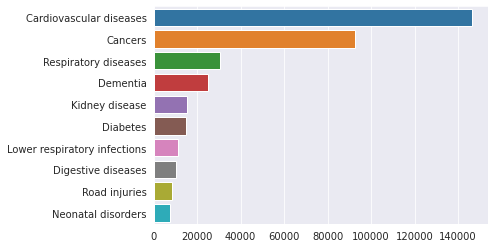

In [9]:
turkey_2017 = df[df.Entity == "Turkey"].groupby("Year").sum().loc[2017].sort_values(ascending=False)

# plt.figure(figsize=(15,9))
sns.barplot(x=turkey_2017.values[:10],y=turkey_2017.index[:10],orient="h")

Display their percentage in pie graph: 
* Almost 4 out 10 deaths in Turkey are caused by Cardiovasculare diseases in 2017


Text(0, 0.5, '')

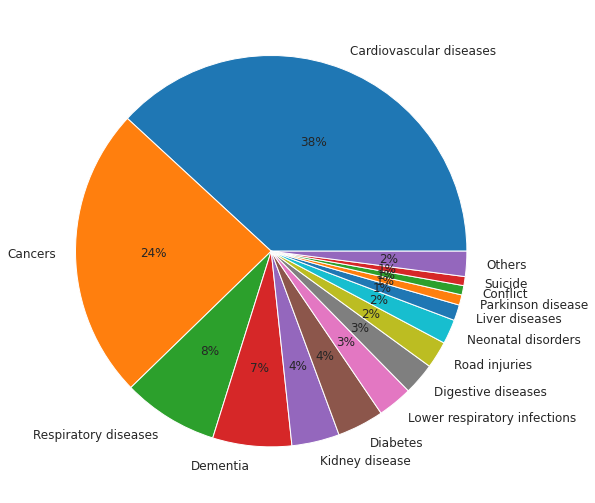

In [10]:
turkey_2017_pie = turkey_2017[turkey_2017>2000]
turkey_2017_pie["Others"] = sum(turkey_2017[turkey_2017<=2000])
turkey_2017_pie.plot(kind="pie",autopct="%.0f%%",figsize=(9,9),fontsize=12)
plt.ylabel("")

The "Execution" column is actually not numeric as it has categories like ">1000", let's fix it and continue descriptive stats

In [0]:
df.Execution.replace({'>1000':1000, '>1': 1},inplace=True)
df.Execution = df.Execution.astype(int)

Top 10 countries with the highest **execution** numbers

Text(0.5, 0, 'Total # of Executions')

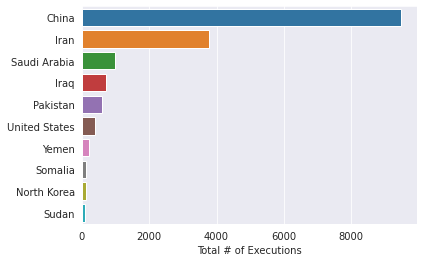

In [12]:
country_execution = df.groupby("Entity").sum()["Execution"].sort_values(ascending=False)
sns.barplot(x=country_execution.values[1:11],y=country_execution.index[1:11],orient="h")
plt.ylabel("")
plt.xlabel("Total # of Executions")

Top 20 countries which suffered from **terrorism** the most. Our dataset Entity column contains a mix of country, continent, region, territory information too such as Sub-Saharan Africa, South America etc. 

Text(0.5, 0, 'Total Deaths 1990-2017')

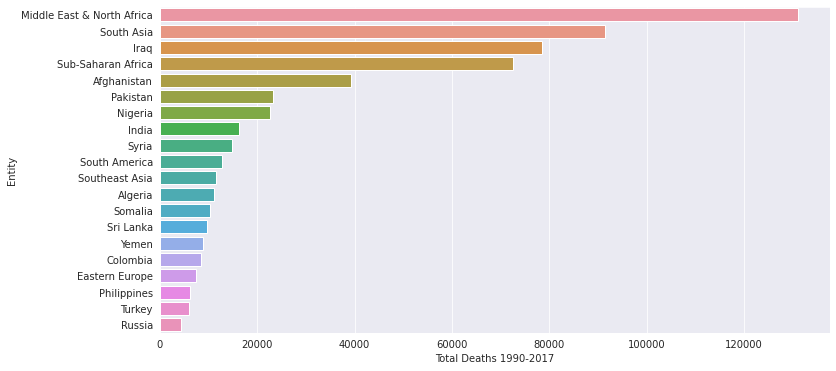

In [13]:
country_terrorism = df.groupby("Entity").sum()["Terrorism"].sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=country_terrorism[1:21].values,y=country_terrorism[1:21].index,orient="h")
plt.xlabel("Total Deaths 1990-2017")

**Deadliest** year was 2017, however this could be related to increase of the world population each year. We need to check death rate per year

Text(0, 0.5, '# of Deaths')

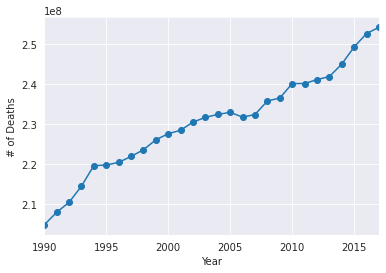

In [14]:
df["total_death"] = df.iloc[:,3:].sum(axis=1)

death_by_year = df.groupby("Year").sum()["total_death"]
death_by_year.plot(marker="o")
plt.ylabel("# of Deaths")

Find world population per year from the internet and plot year vs death rate (%):
* **1994** was the deadliest year with almost 4% of the population was died


Text(0, 0.5, '# of Death / Population (%)')

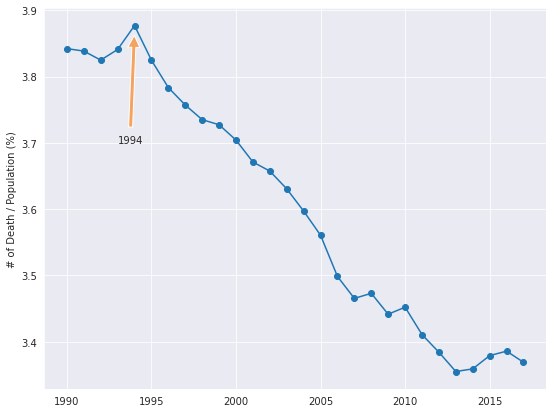

In [15]:
world_population = "7547858925	7464022049	7379797139	7295290765	7210581976	7125828059	7041194301	6956823603	6872767093	6789088686	6705946610	6623517833	6541907027	6461159389	6381185114	6301773188	6222626606	6143493823	6064239055	5984793942	5905045788	5824891951	5744212979	5663150427	5581597546	5498919809	5414289444	5327231061".split("	")
world_population = pd.Series(world_population).astype(int).sort_values(ascending=True).reset_index(drop=True)
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.plot(death_by_year.index,100*death_by_year.values/world_population,marker="o")
ax.annotate("1994",xy=(1994,3.87), xytext=(1993,3.7),
                   arrowprops=dict(facecolor="sandybrown",shrink=0.05))
plt.ylabel("# of Death / Population (%)")

Lets examine what was the cause for this high death rate in 1994. **Conflict** line of the heatmap shows an interesting light colour on year 1994 (the lighter the colour the higher the number of deaths)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


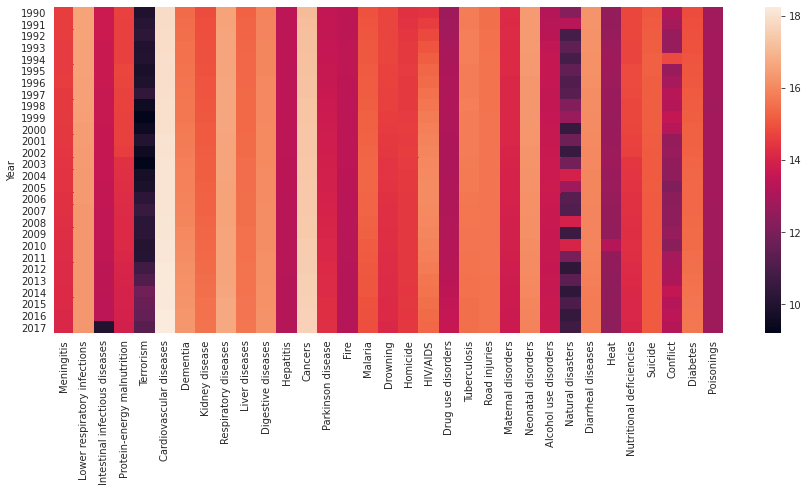

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(np.log(df.drop(["Entity","Execution","total_death"],axis=1).groupby("Year").sum()).replace(-np.inf,10))

Conflict graph shows that **1994** was the year where the deadliest conflicts took place in the world. Bosnian War in Europe may have contributed to it significantly.

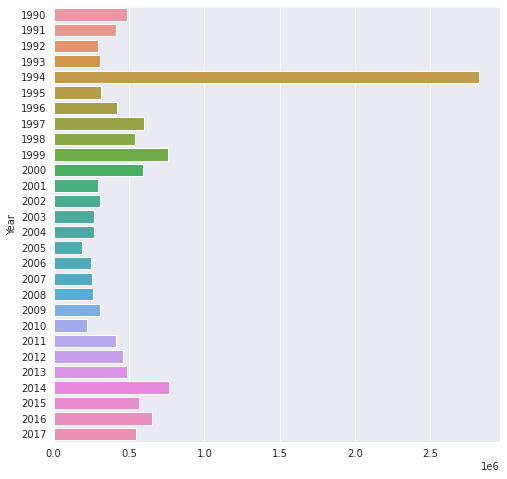

In [17]:
year_conflict = df.groupby("Year").sum()["Conflict"]
plt.figure(figsize=(8,8))
sns.barplot(y=year_conflict.index,x=year_conflict.values,orient="h")

Death by terrorism peaked in 2014, and has been declining since then, however no effect was observed on 1994 death toll


Text(0, 0.5, 'Death by Terrorism')

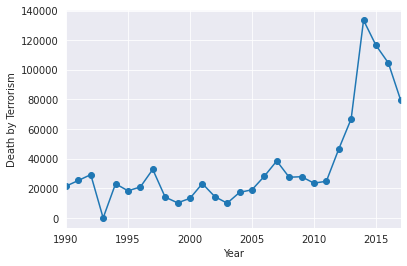

In [18]:
df.groupby("Year").sum()["Terrorism"].plot(marker="o")
plt.ylabel("Death by Terrorism")

Let's find out which country suffers from what disease the most. First, change our dataset's country names to the exact matches with the pycountry country names

In [19]:
df.Entity.replace({"South Korea":"Korea, Republic of",
                   "Taiwan":"Taiwan (Republic of China)",
                   "Bolivia":"Bolivia, Plurinational State of",
                   "Brunei":"Brunei Darussalam",
                   "Czech Republic":"Czechia",
                   "England":"United Kingdom",
                   "Iran":"Iran, Islamic Republic of",
                   "Laos":"lao people’s democratic republic",
                   "Macedonia":"Macedonia, the former Yugoslav Republic of",
                   "Moldova":"Moldova, Republic of",
                   "North Korea":"Korea, Democratic People’s Republic of",
                   "Palestine":"Palestine, State of",
                   "Russia":"Russian Federation",
                   "Syria":"Syrian Arab Republic",
                   "Venezuela":"Venezuela, Bolivarian Republic of",
                   "Vietnam":"Viet Nam",
                   "Cote d'Ivoire":"Côte d'Ivoire",
                   "Tanzania":"Tanzania, United Republic of",
                   "Democratic Republic of Congo":"Congo, The Democratic Republic of the",
                   "Bosnia-Herzegovina":"Bosnia and Herzegovina",
                   "Macau":"Macao",
                   "Serbia-Montenegro":"Montenegro"},inplace=True)

cause_by_country = df.groupby("Entity").sum().drop(["Year","total_death"],axis=1).idxmax(axis=1)
cause_by_country.value_counts()

Cardiovascular diseases         183
HIV/AIDS                         20
Terrorism                        15
Execution                         9
Malaria                           9
Cancers                           6
Lower respiratory infections      5
Diarrheal diseases                4
Neonatal disorders                2
Conflict                          1
dtype: int64

Group countries by the most frequent disease types

In [0]:
cause_by_country = pd.DataFrame(list(zip(cause_by_country,cause_by_country.index)),columns=["Common Disease","Country"])
cause_by_country = cause_by_country.groupby("Common Disease").agg(list)

In order to colour countries by disease, lets use pygal package

In [21]:
!pip install pygal_maps_world
!pip install pycountry

We will need the pycountry package to convert country names to country codes

In [0]:
import pycountry
country_mapping = {country.name: country.alpha_2.lower() for country in pycountry.countries}

Use pycountry to convert country names into country codes which will be used in the map



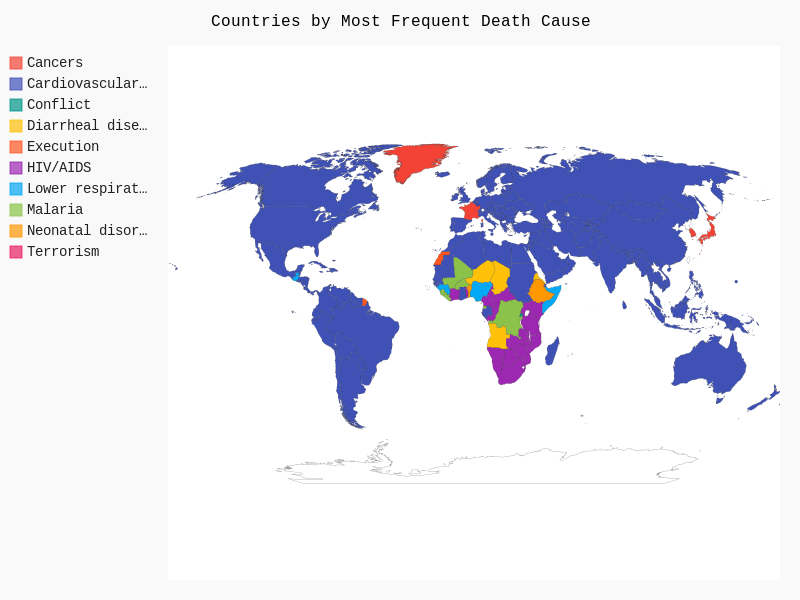

In [23]:
!pip install CairoSVG

from pygal_maps_world.maps import World

# Get all country mappings, using two digit codes

worldmap_chart = World()
worldmap_chart.title = 'Countries by Most Frequent Death Cause'

for cause in cause_by_country.index:
  COUNTRIES = cause_by_country.loc[cause].values[0]

  # Map countries
  country_codes = [country_mapping.get(country) for country in COUNTRIES]
  country_codes = [i for i in list(filter(None,country_codes))]

  worldmap_chart.add(cause, country_codes)
  
worldmap_chart.render()
worldmap_chart

It is obvious that Cardiovascular Disease dominate death toll all over the world, how would the World map look if we took them out?

* It appears that the second most leading cause of death in rich countries like USA, Canada, Europe, Japan and Australia is **Dementia** (mainly caused by Alzheimer's disease). This could be due to the high frequency of elder people in their population.
* **Conflict** is leading cause for war territories like Syria and Palestine
* For Russia and their neighbours like old SSCB countries, Eastern European countries leading cause is **Digestive** diseases like Ulcer, Cirrhosis, Hepatitis. It could be related to excessive consumption of alcohol.
* **Diarrheal** diseases causes deaths mostly in the mid African region
* **HIV/AIDS** deaths are the most frequent in the South African region
* Some of the South American countries have **Homicide** as the leading cause for death
* Lower respiratory infections like **Tuberculosis**, **Pneumonia** is the leading cause for mainly South American countries like Brazil and Argentina.
* China, India and surrounding countries suffers from Respiratory diseases like **Asthma** and **Lung Cancer** etc.
* The countries where **road accidents** are one of the leading cause of death are in the Gulf region like Iran, Saudi Arabia, UAE. It could be related to their habit of car stunt driving.
* Greenland is the only country where **suicide** is leading cause of death.


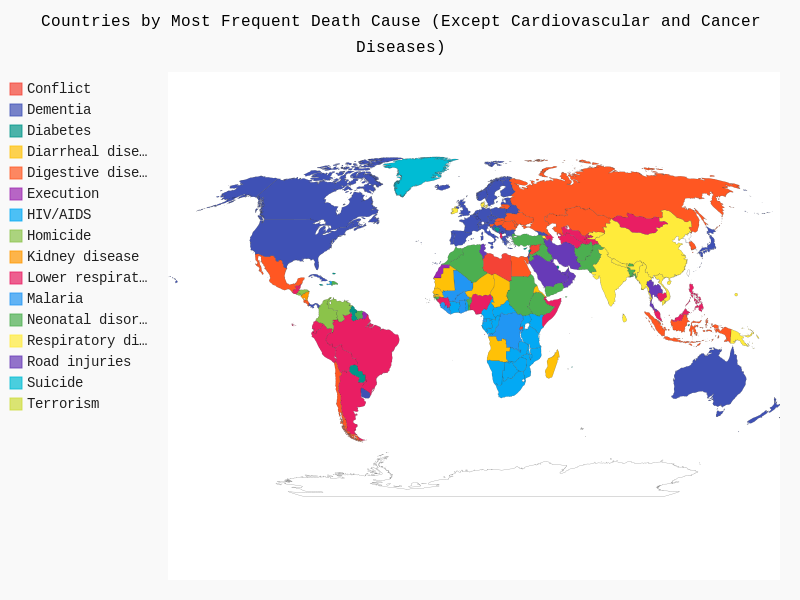

In [24]:
cause_by_country = df.groupby("Entity").sum().drop(["Year","total_death","Cardiovascular diseases","Cancers"],axis=1).idxmax(axis=1)
cause_by_country = pd.DataFrame(list(zip(cause_by_country,cause_by_country.index)),columns=["Common Disease","Country"])
cause_by_country = cause_by_country.groupby("Common Disease").agg(list)

worldmap_chart = World()
worldmap_chart.title = 'Countries by Most Frequent Death Cause (Except Cardiovascular and Cancer Diseases)'

for cause in cause_by_country.index:
  COUNTRIES = cause_by_country.loc[cause].values[0]

  # Map countries
  country_codes = [country_mapping.get(country) for country in COUNTRIES]
  country_codes = [i for i in list(filter(None,country_codes))]

  worldmap_chart.add(cause, country_codes)
  
worldmap_chart.render()
worldmap_chart